In [1]:
import yfinance as yf

def getData(symbol, data):
    ticker = yf.Ticker(symbol)
    histData = ticker.history(period='5y')
    return histData[data][:-360]

price = getData("PTT.BK", "Close")
volume = getData("PTT.BK", "Volume")

In [2]:
price

Date
2017-04-04    31.940359
2017-04-05    31.777393
2017-04-07    31.940359
2017-04-10    32.184795
2017-04-11    32.103321
                ...    
2020-10-01    30.750196
2020-10-02    30.051325
2020-10-05    30.051325
2020-10-06    30.750196
2020-10-07    30.750196
Name: Close, Length: 857, dtype: float64

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(price).reshape(-1,1))

scalerPrice = MinMaxScaler(feature_range= (0,1))
scalerVolume = MinMaxScaler(feature_range= (0,1))

df1 = scalerPrice.fit_transform(np.array(price).reshape(-1,1))
df2 = scalerVolume.fit_transform(np.array(volume).reshape(-1,1))

In [4]:
def splitData(df):
    trainingSize = int(len(df)*0.65)
    testSize = len(df)-trainingSize
    trainData, testData = df[0:trainingSize,:], df[trainingSize:len(df),:1]
    return trainData, testData

df1TrainData, df1TestData = splitData(df1)
df2TrainData, df2TestData = splitData(df2)

In [5]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

df1XTrain, df1YTrain = create_dataset(df1TrainData, 100)
df1XTest, df1YTest = create_dataset(df1TestData, 100)

df2XTrain, df2YTrain = create_dataset(df2TrainData, 100)
df2XTest, df2YTest = create_dataset(df2TestData, 100)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

priceModel=Sequential()
priceModel.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
priceModel.add(LSTM(50,return_sequences=True))
priceModel.add(LSTM(50))
priceModel.add(Dense(1))
priceModel.compile(loss='mean_squared_error',optimizer='adam')

volumeModel=Sequential()
volumeModel.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
volumeModel.add(LSTM(50,return_sequences=True))
volumeModel.add(LSTM(50))
volumeModel.add(Dense(1))
volumeModel.compile(loss='mean_squared_error',optimizer='adam')

In [7]:
priceModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [8]:
volumeModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
priceModel.fit(df1XTrain,df1YTrain,validation_data=(df1XTest,df1YTest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 4s 185ms/step - loss: 0.2623 - val_loss: 0.0797
Epoch 2/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0338 - val_loss: 0.0141
Epoch 3/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0171 - val_loss: 0.0299
Epoch 4/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0097 - val_loss: 0.0297
Epoch 5/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0066 - val_loss: 0.0192
Epoch 6/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0056 - val_loss: 0.0305
Epoch 7/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0048 - val_loss: 0.0204
Epoch 8/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0045 - val_loss: 0.0253
Epoch 9/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0043 - val_loss: 0.0202
Epoch 10/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0040 - val_loss: 0.0208
Epoch 11/100
8/8 [

Epoch 84/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0019 - val_loss: 0.0083
Epoch 85/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0020 - val_loss: 0.0086
Epoch 86/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0019 - val_loss: 0.0083
Epoch 87/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0020 - val_loss: 0.0082
Epoch 88/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0020 - val_loss: 0.0090
Epoch 89/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0019 - val_loss: 0.0093
Epoch 90/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0021 - val_loss: 0.0093
Epoch 91/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0020 - val_loss: 0.0100
Epoch 92/100
8/8 [==============================] - 1s 90ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 93/100
8/8 [==============================] - 1s 90ms/step - loss: 0.0023 - val_loss: 0.0105
Epoch 94/1

In [10]:
volumeModel.fit(df2XTrain,df2YTrain,validation_data=(df2XTest,df2YTest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 4s 194ms/step - loss: 0.0083 - val_loss: 0.0102
Epoch 2/100
8/8 [==============================] - 1s 84ms/step - loss: 0.0047 - val_loss: 0.0101
Epoch 3/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0044 - val_loss: 0.0097
Epoch 4/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0042 - val_loss: 0.0097
Epoch 5/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 6/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 7/100
8/8 [==============================] - 1s 92ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 8/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0040 - val_loss: 0.0097
Epoch 9/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0043 - val_loss: 0.0097
Epoch 10/100
8/8 [==============================] - 1s 92ms/step - loss: 0.0039 - val_loss: 0.0095
Epoch 11/100
8/8 [

Epoch 84/100
8/8 [==============================] - 1s 85ms/step - loss: 0.0030 - val_loss: 0.0071
Epoch 85/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0030 - val_loss: 0.0072
Epoch 86/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0031 - val_loss: 0.0071
Epoch 87/100
8/8 [==============================] - 1s 90ms/step - loss: 0.0036 - val_loss: 0.0078
Epoch 88/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 89/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 90/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 91/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 92/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 93/100
8/8 [==============================] - 1s 88ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 94/1

In [11]:
import tensorflow as tf

df1TrainPredict=priceModel.predict(df1XTrain)
df1TestPredict=priceModel.predict(df1XTest)

df2TrainPredict=volumeModel.predict(df2XTrain)
df2TestPredict=volumeModel.predict(df2XTest)

##Transformback to original form
df1TrainPredict=scalerPrice.inverse_transform(df1TrainPredict)
df1TestPredict=scalerPrice.inverse_transform(df1TestPredict)

df2TrainPredict=scalerVolume.inverse_transform(df2TrainPredict)
df2TestPredict=scalerVolume.inverse_transform(df2TestPredict)

In [12]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df1YTrain,df1TrainPredict))

40.82547518029299

In [13]:
math.sqrt(mean_squared_error(df1YTest,df1TestPredict))

35.28085723288469

In [14]:
import matplotlib.pyplot as plt
def plotting1(df, train, test, scalerType):
    # shift train predictions for plotting
    look_back=100
    trainPredictPlot = np.empty_like(df)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train)+look_back, :] = train
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df1)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train)+(look_back*2)+1:len(df1)-1, :] = test
    # plot baseline and predictions
    plt.plot(scalerType.inverse_transform(df))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()    

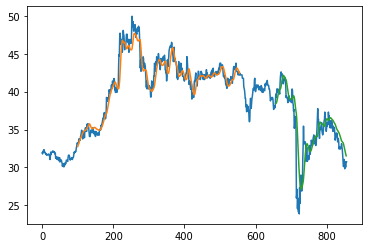

In [15]:
plotting1(df1, df1TrainPredict, df1TestPredict, scalerPrice)

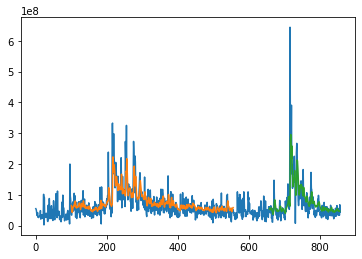

In [16]:
plotting1(df2, df2TrainPredict, df2TestPredict, scalerVolume)

In [17]:
len(df1TestData)

300

In [18]:
def tempInput(testData):
    xInput=testData[200:].reshape(1,-1)
    tempInput=list(xInput)
    tempInput=tempInput[0].tolist()
    return tempInput, xInput
    
priceTempInput, priceInput = tempInput(df1TestData)
volumeTempInput, volumeInput = tempInput(df2TestData)

In [19]:
len(volumeTempInput)

100

In [20]:
from numpy import array

priceOutput=[]
n_steps=100
i=0
while(i<30):
    
    if(len(priceTempInput)>100):
        priceInput=np.array(priceTempInput[1:])
        priceInput=priceInput.reshape(1,-1)
        priceInput = priceInput.reshape((1, n_steps, 1))
        yhat = priceModel.predict(priceInput, verbose=0)
        priceTempInput.extend(yhat[0].tolist())
        priceTempInput=priceTempInput[1:]
        priceOutput.extend(yhat.tolist())
        i=i+1
    else:
        priceInput = priceInput.reshape((1, n_steps,1))
        yhat = priceModel.predict(priceInput, verbose=0)
        print(yhat[0])
        priceTempInput.extend(yhat[0].tolist())
        print(len(priceTempInput))
        priceOutput.extend(yhat.tolist())
        i=i+1
    

print(priceOutput)

[0.28528875]
101
[[0.2852887511253357], [0.2837812304496765], [0.2840746343135834], [0.28576281666755676], [0.2884153723716736], [0.2916642129421234], [0.2952325642108917], [0.29893356561660767], [0.3026527464389801], [0.3063284754753113], [0.30993369221687317], [0.31346118450164795], [0.31691479682922363], [0.3203025758266449], [0.32363370060920715], [0.3269169330596924], [0.3301597237586975], [0.3333682715892792], [0.3365478813648224], [0.3397030532360077], [0.34283748269081116], [0.34595435857772827], [0.3490566909313202], [0.3521469831466675], [0.3552272319793701], [0.35829928517341614], [0.3613646328449249], [0.36442455649375916], [0.36748015880584717], [0.37053221464157104]]


In [21]:
volumeOutput=[]
n_steps=100
i=0
while(i<30):
    
    if(len(volumeTempInput)>100):
        volumeInput=np.array(volumeTempInput[1:])
        volumeInput=volumeInput.reshape(1,-1)
        volumeInput = volumeInput.reshape((1, n_steps, 1))
        yhat = volumeModel.predict(volumeInput, verbose=0)
        volumeTempInput.extend(yhat[0].tolist())
        volumeTempInput=volumeTempInput[1:]
        volumeOutput.extend(yhat.tolist())
        i=i+1
    else:
        volumeInput = volumeInput.reshape((1, n_steps,1))
        yhat = volumeModel.predict(volumeInput, verbose=0)
        print(yhat[0])
        volumeTempInput.extend(yhat[0].tolist())
        print(len(volumeTempInput))
        volumeOutput.extend(yhat.tolist())
        i=i+1
    

print(volumeOutput)

[0.07940005]
101
[[0.07940004765987396], [0.0806509330868721], [0.08208606392145157], [0.08335810154676437], [0.08442265540361404], [0.08533994853496552], [0.08618410676717758], [0.08701750636100769], [0.08788542449474335], [0.08881563693284988], [0.08982031047344208], [0.09089940041303635], [0.09204395860433578], [0.0932396948337555], [0.09447000920772552], [0.09571835398674011], [0.09697000682353973], [0.0982130765914917], [0.0994388610124588], [0.10064175724983215], [0.10181904584169388], [0.1029701828956604], [0.10409630089998245], [0.10519950091838837], [0.1062823086977005], [0.10734730958938599], [0.10839681327342987], [0.10943262279033661], [0.11045613139867783], [0.1114681139588356]]


In [22]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

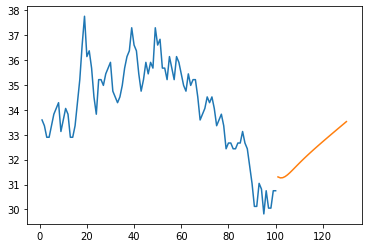

In [23]:
import matplotlib.pyplot as plt
plt.plot(day_new,scalerPrice.inverse_transform(df1[757:]))
plt.plot(day_pred,scalerPrice.inverse_transform(priceOutput))

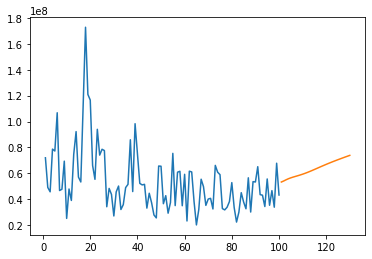

In [24]:
import matplotlib.pyplot as plt
plt.plot(day_new,scalerVolume.inverse_transform(df2[757:]))
plt.plot(day_pred,scalerVolume.inverse_transform(volumeOutput))